# Datetime String Parsing/Formatting
## Research Questions
**What are the most common string formats used for datetimes?**
The most common formats for formatting strings are ISO compliant. Among format-dependant functions (formatters or format-dependant parsers) `.isoformat` makes up 13.97% of the total count while the two most common format strings `'%Y-%m-%d` and `%Y-%m-%d %H:%M:%S` make up 8.48% and 7.03% of the count respectively. Format strings become much more varied from there with the next most common format `%Y%m%d` only accounting for 2.55%. Another interesting format is `.ctime()`, a much more human readable format, which represents 6.13% of the data.

**How often do people follow standards vs. use their own formats?**
By far the most common function calls which deal with formatting/parsing are `stftime` and `strptime` which account for 72.46% of all functions found. However, the format string which people use with these methods actually *are* often ISO compliant, as mentioned above. In `strftime`, 19.99% of format strings use ISO 8601 and an additional 15.63% use a slightly modified version of ISO 8601 (replacing the "T" with some other character - often a space). In `strptime`, 37.13% use pure ISO 8601 and 17.26% use a modified version.

**How often do people use format agnostic parsers?**
 * How often are there bugs related to unclear date formats?
 * These are hard to detect because most of them are just named "parse"

**How consistent are people with formats within a single project?**
 * How many calls do people make to parse/format methods per project
 * How many formats are used within strftime and strptime in each project

**How much intention are people putting into their formats?**
 * Not quantifiable at all
 * strftime vs builtins
 * "least resistance methods" like `str()` or format strings.
 
**How often do people store timezone information in their format strings?**
Only 5.92% of format strings include a format directive to include the timezone, and another 3.98% hard code in a timezone (most oftem
 5.924%
162, 3.982%

 
## Issues with the current scripts
 * Hard to detect `from a import b; b()`. Most `parse` methods fall under this category.
 * Not currently distinguishing between `time.strftime` and `datetime.strftime`.
 * Can't properly handle multiline calls.
 * Can't properly handle format constants e.g. `FORMAT = '%Y%m%d'; dt.strftime(FORMAT)`.
 * False positives on comments mentioning method names.
 * Doesn't detect str() or format strings

In [1]:
%pip install pandas
%pip install numpy
# %pip install seaborn

import pandas as pd
import math
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import re


# Read the data from the CSV file
# STRING_OPS_PATH = '/data/petervan/date-time/data/string_operations.csv'
# to work with the data locally, use a command like:
# scp petervan@bucatini.isri.cmu.edu:/data/petervan/date-time/data/string_operations.csv string_operations.csv
STRING_OPS_PATH = 'string_operations.csv'
df = pd.read_csv(STRING_OPS_PATH)
print(len(df))
df

# df[["owner", "repo", "path", "line", "operation", "text"]].to_csv(STRING_OPS_PATH, index=False)

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
126740


,owner,repo,path,line,operation,pattern,text
0,mkdocs,mkdocs,mkdocs:mkdocs/mkdocs/utils/__init__.py,83,format,strftime,return get_build_datetime().strftime('%Y-%...
1,mkdocs,mkdocs,mkdocs:mkdocs/mkdocs/livereload/__init__.py,79,format,strftime,"return time.strftime(""[%H:%M:%S] "") + ..."
2,prompt-toolkit,python-prompt-toolkit,examples/full-screen/text-editor.py,231,format,isoformat,text = datetime.datetime.now().isoformat()
3,prompt-toolkit,python-prompt-toolkit,examples/prompts/fancy-zsh-prompt.py,56,format,isoformat,") % (datetime.datetime.now().isoformat(),)"
4,nylas,sync-engine,inbox/api/kellogs.py,96,format,isoformat,return obj.isoformat()
...,...,...,...,...,...,...,...
126735,togethercomputer,MoA,FastChat/fastchat/serve/monitor/dataset_releas...,66,format,strftime,"datetime.datetime.fromtimestamp(x, tz=time..."
126736,jishengpeng,ControlSpeech,baseline/promptTTS/utils/commons/trainer.py,545,format,strftime,t = datetime.now().strftime('%Y%m%d%H%...
126737,jishengpeng,ControlSpeech,baseline/promptTTS/utils/commons/trainer.py,551,format,strftime,t = datetime.now().strftime('%Y%m%...
126738,jishengpeng,ControlSpeech,baseline/promptTTS/mfa_usr/mfa.py,477,format,strftime,execution_time = time....


In [2]:
def get_even_colors(cmap, n):
    if type(cmap) == str:
        cmap = matplotlib.colormaps[cmap]
    return [cmap(i/(n))for i in range(n)]

('MyEMS', 'myems') 2485


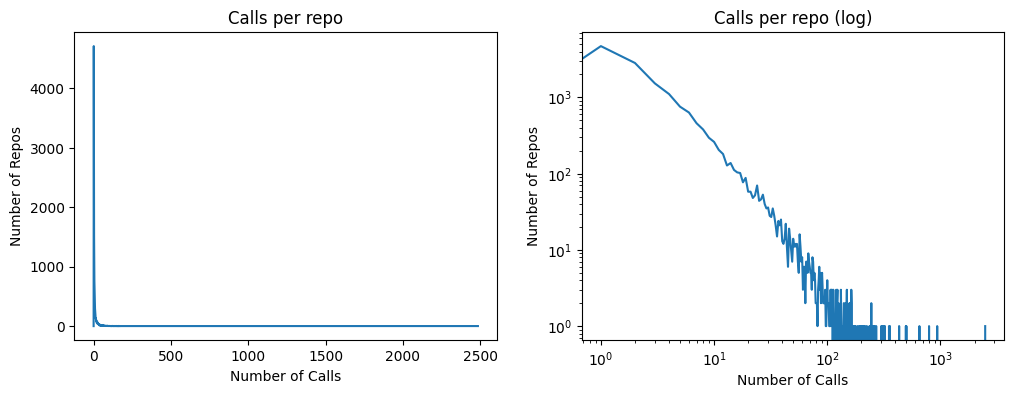

In [3]:
# What is the distribution of number of calls per repo

counter = dict()
for i, row in df.iterrows():
    counter[(row["owner"], row["repo"])] = counter.get((row["owner"], row["repo"]), 0) + 1

maxcount = max(list(counter.values()))
for repo in counter:
    if counter[repo] == maxcount:
        print(repo, maxcount)

count_dist = [0] * (maxcount+1)

for v in counter.values():
    count_dist[v] += 1

# plot

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
ax.set_title("Calls per repo")
ax.set_xlabel("Number of Calls")
ax.set_ylabel("Number of Repos")
ax.plot(range(maxcount+1), count_dist)

ax = fig.add_subplot(122)
ax.set_title("Calls per repo (log)")
ax.set_xlabel("Number of Calls")
ax.set_ylabel("Number of Repos")
ax.plot(range(maxcount+1), count_dist)
ax.set_xscale('log')
ax.set_yscale('log')

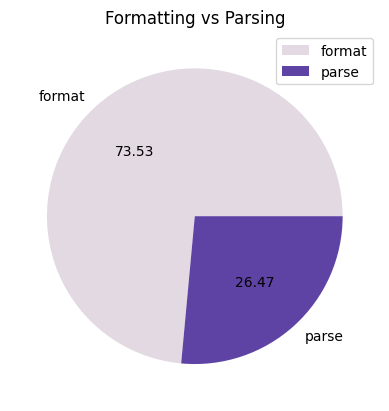

In [4]:
# What is the distribution of operations
categories, counts = np.unique(df["operation"], return_counts=True)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Formatting vs Parsing")
colors = get_even_colors("twilight", 3)
ax.pie(x=counts, labels=categories, colors = colors, autopct="%.4g")
ax.legend()

((19, 276, 280, 1455, 1485, 7049, 8292, 16048, 21741, 70095),
 ('maya.parse',
  'dateparser.parse',
  'pendulum.parse',
  'arrow.get',
  'dateutil.parser.parse',
  'ctime',
  'to_datetime',
  'isoformat',
  'strptime',
  'strftime'))

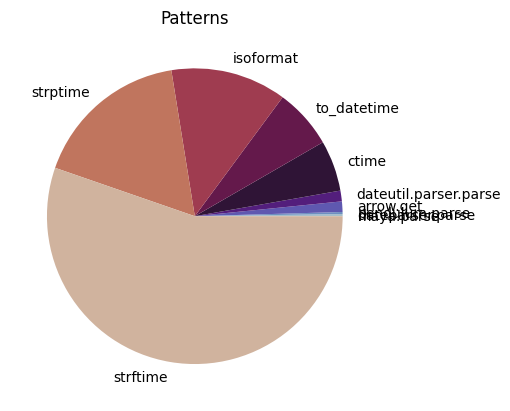

In [15]:
# What is the distribution of patterns
categories, counts = np.unique(df["pattern"], return_counts=True)
counts, categories = zip(*sorted(list(zip(counts, categories))))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Patterns")
colors = get_even_colors("twilight", len(categories))
ax.pie(x=counts, labels=categories, colors = colors)
counts, categories
# ax.legend(loc="upper right")

In [20]:
for count, cat in zip(counts, categories):
    print(cat, count, count/(sum(counts)))

maya.parse 19 0.00014991320814265426
dateparser.parse 276 0.0021776866024932934
pendulum.parse 280 0.002209247277891747
arrow.get 1455 0.011480195676187471
dateutil.parser.parse 1485 0.011716900741675872
ctime 7049 0.055617800220924725
to_datetime 8292 0.06542528010099416
isoformat 16048 0.12662142969859555
strptime 21741 0.17154016095944452
strftime 70095 0.55306138551365


## Finding common string formats
For now I'm only going to consider the following patterns:
 * `strftime` (datetime and time)
 * `strptime` (datetime and time)
 * `ctime`
 * `isoformat`
 
These make up around 90% of the table, and make up basically all of the patterns that use formats (i.e. aren't format agnostic parsers).

In [19]:
filtered_df = df[df["pattern"].isin(["strftime", "strptime", "ctime", "isoformat"])]
print(len(filtered_df) / len(df))
print(len(filtered_df))

0.9068407763926148
114933


In [18]:
# first, strftime formats because they're easiest to parse
pattern = "strftime\\(\\s*[\"\'](.*?)[\"\']\\s*\\)"
print(pattern)
strf_counts = dict()
for i,row in df.iterrows():
    if row["pattern"] == "strftime":
        match = re.search(pattern, row["text"])
        if match is not None:
            strf_counts[match.group(1)] = strf_counts.get(match.group(1), 0) + 1

print(sum(strf_counts.values()))
sorted_strf_counts = sorted(list(zip(strf_counts.values(), strf_counts.keys())), reverse=True)
for i in range(10):
    print(sorted_strf_counts[i])

strftime\(\s*["'](.*?)["']\s*\)
50433
(6382, '%Y-%m-%d')
(6295, '%Y-%m-%d %H:%M:%S')
(2316, '%Y%m%d')
(1563, '%Y%m%d-%H%M%S')
(1526, '%H:%M:%S')
(1095, '%Y-%m-%dT%H:%M:%S')
(1038, '%Y%m%d%H%M%S')
(1003, '%Y')
(820, '%Y-%m-%d_%H-%M-%S')
(753, '%Y-%m-%d-%H-%M-%S')


In [8]:
# strptime should be the same with a slightly longer regex
pattern = "strptime\\(.*?,\\s*[\"\'](.*?)[\"\']\\s*\\)"
print(pattern)
strp_counts = dict()
for i,row in df.iterrows():
    if row["pattern"] == "strptime":
        match = re.search(pattern, row["text"])
        if match is not None:
            strp_counts[match.group(1)] = strp_counts.get(match.group(1), 0) + 1

sorted_strp_counts = sorted(list(zip(strp_counts.values(), strp_counts.keys())), reverse=True)
for i in range(10):
    print(sorted_strp_counts[i])

strptime\(.*?,\s*["'](.*?)["']\s*\)
(3361, '%Y-%m-%d')
(1788, '%Y-%m-%d %H:%M:%S')
(618, '%Y%m%d')
(601, '%Y-%m-%dT%H:%M:%S')
(555, '%Y-%m-%dT%H:%M:%SZ')
(373, '%Y-%m-%d %H:%M:%S.%f')
(333, '%Y-%m-%dT%H:%M:%S.%fZ')
(301, '%H:%M')
(291, '%H:%M:%S')
(268, '%d/%m/%Y')


In [9]:
# how ISO compliant are these format strings?
# It's weirdly hard to find a summary of ISO 8601 online or even a full version that doesn't cost >$100
# this is what I'm going off of https://www.w3.org/TR/NOTE-datetime
# 
def is_iso(fmt):
    components = ["%Y", "-%m", "-%d", "T", "%H", ":%M", ":%S", "\\.%f"]
    tzs = ["", "Z", "%:z"]
    for component in components:
        match = re.match(component, fmt)
        if match is None:
            return False
        else:
            fmt = fmt[match.end():]
        
        if fmt in tzs:
            return True
    return False

def is_almost_iso(fmt):
    components = ["%Y", "-%m", "-%d", ".", "%H", ":%M", ":%S", "\\.%f"]
    tzs = ["", "Z", "%:z"]
    for component in components:
        match = re.match(component, fmt)
        if match is None:
            return False
        else:
            fmt = fmt[match.end():]
        
        if fmt in tzs:
            return True
    return False
    
assert is_iso("%Y-%m-%dT%H")
assert not is_iso("%Y-%m-%d %H")
assert is_almost_iso("%Y-%m-%d %H")
assert not is_iso("%Y-%m-%d %H%M%S")
assert not is_iso("%Y-%m-%d %H:%")
assert not is_iso("%Y-%m-%d %H:%M:%S.%fffffffffff")

[10080, 7882, 32471] 50433
[5148, 2393, 6323] 13864


''

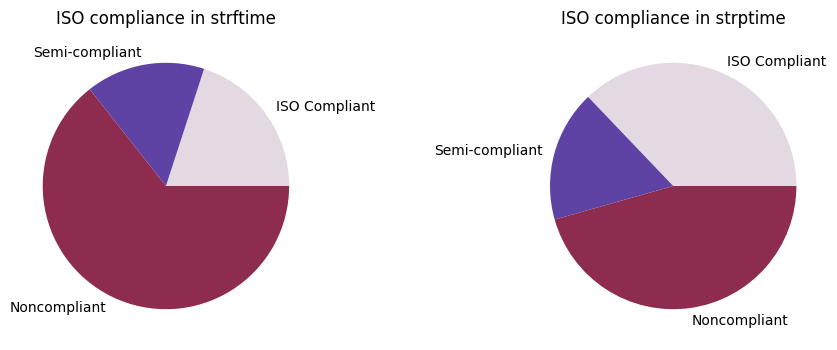

In [23]:
labels = ["ISO Compliant", "Semi-compliant", "Noncompliant"]
strf_x = [0,0,0]
strp_x = [0,0,0]

for (count,fmt) in sorted_strf_counts:
    if is_iso(fmt):
        strf_x[0] += count
    elif is_almost_iso(fmt):
        strf_x[1] += count
    else:
        strf_x[2] += count

for (count,fmt) in sorted_strp_counts:
    if is_iso(fmt):
        strp_x[0] += count
    elif is_almost_iso(fmt):
        strp_x[1] += count
    else:
        strp_x[2] += count

    
fig = plt.figure(figsize=(12,4))
colors = get_even_colors("twilight", 3)

ax = fig.add_subplot(121)
ax.set_title("ISO compliance in strftime")
ax.pie(x=strf_x, labels=labels, colors = colors)
print(strf_x, sum(strf_x))

ax = fig.add_subplot(122)
ax.set_title("ISO compliance in strptime")
ax.pie(x=strp_x, labels=labels, colors = colors)
print(strp_x, sum(strp_x))

"" 

In [11]:
# how often do people use each format directive
real_directives = ['%a', '%A', '%w', '%d', '%b', '%B', '%m', '%y', '%Y', '%H', '%I', '%p', '%M', '%S', '%f', '%z', '%Z', '%j', '%U', '%W', '%c', '%x', '%X', '%G', '%u', '%V', '%:z', '%%']
directives = {}
for (count, fmt) in sorted_strf_counts + sorted_strp_counts:
    for i in range(len(fmt)-1):
        if fmt[i] == "%":
            directive = fmt[i:i+2]
            directives[directive] = directives.get(directive,0)+1
sorted_directives = sorted(list(zip(directives.values(), directives.keys())), reverse=True)
for count,d in sorted_directives:
    if d in real_directives:
        print(f"{d}: {count}")
    else:
        print(f"{d}: {count:<10} (invalid)")

%d: 3255
%Y: 2885
%M: 2872
%H: 2646
%m: 2494
%S: 2021
%b: 588
%B: 358
%f: 346
%y: 328
%p: 316
%I: 292
%a: 229
%A: 195
%z: 137
%Z: 124
%-: 114        (invalid)
%X: 81
%s: 60         (invalid)
%j: 42
%%: 42
%W: 27
%0: 25         (invalid)
%F: 24         (invalid)
%T: 22         (invalid)
%w: 21
%e: 20         (invalid)
%D: 18         (invalid)
%x: 17
%h: 17         (invalid)
%c: 13
%V: 13
%3: 13         (invalid)
%G: 12
%u: 10
%2: 9          (invalid)
%r: 7          (invalid)
%U: 6
%P: 6          (invalid)
%#: 6          (invalid)
%l: 5          (invalid)
% : 3          (invalid)
%R: 2          (invalid)
%C: 2          (invalid)
%4: 2          (invalid)
%(: 2          (invalid)
%q: 1          (invalid)
%i: 1          (invalid)
%_: 1          (invalid)
%^: 1          (invalid)
%+: 1          (invalid)
%': 1          (invalid)


In [29]:
# how often do people include timezone information in their format strings
# just checking for "z" actually seems pretty good because they're either
# * using Z because the datetime is always going to be UTC
# * using %Z, %z or %:z which records the timezone of the datetime
# * using a word which contains "z" in it, which is very unlikely
tzcount = 0
hardtzcount = 0
nontzcount = 0
for count,d in sorted_strf_counts + sorted_strp_counts:
    if "%z" in d.lower() or "%:z" in d:
        tzcount += 1
    elif "Z" in d or re.search("\+\d\d(:|)\d\d", d) is not None:
        hardtzcount += 1
    else:
        nontzcount += 1

print(f"{tzcount}, {100*tzcount/(nontzcount+tzcount+hardtzcount):.4}%")
print(f"{hardtzcount}, {100*hardtzcount/(nontzcount+tzcount+hardtzcount):.4}%")
print(f"{nontzcount}, {100*nontzcount/(nontzcount+tzcount+hardtzcount):.4}%")

241, 5.924%
162, 3.982%
3665, 90.09%
